In [15]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\AI&ML\Data_Set\Practice\Sales Dataset.csv")

In [5]:
df.head()

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100


In [27]:
df.shape

(1000, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [11]:
df.isnull().sum()

Unnamed: 0          0
Date                0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [19]:
df.nunique()

Unnamed: 0          1000
Date                 345
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [21]:
df.describe()

,Unnamed: 0,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,499.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,0.000000,18.00000,1.000000,25.000000,25.000000
25%,249.750000,29.00000,1.000000,30.000000,60.000000
50%,499.500000,42.00000,3.000000,50.000000,135.000000
75%,749.250000,53.00000,4.000000,300.000000,900.000000
max,999.000000,64.00000,4.000000,500.000000,2000.000000


In [23]:
df = df.drop('Unnamed: 0', axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   object        
 2   Age               1000 non-null   int64         
 3   Product Category  1000 non-null   object        
 4   Quantity          1000 non-null   int64         
 5   Price per Unit    1000 non-null   int64         
 6   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 54.8+ KB


In [25]:
df.duplicated().sum()

0

In [29]:
#Grouping the Ages

bins = [17, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['Age'] = pd.cut(df['Age'], bins = bins, labels = labels, right=True)
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,26-35,Beauty,3,50,150
1,2023-02-27,Female,26-35,Clothing,2,500,1000
2,2023-01-13,Male,46-55,Electronics,1,30,30
3,2023-05-21,Male,36-45,Clothing,1,500,500
4,2023-05-06,Male,26-35,Beauty,2,50,100


### Conclusions from data cleaning
After completing the data cleaning steps, the following key changes and observations were made:

No missing values were found in the dataset.

No duplicate records were detected.

The first column was removed, as it only contained entry numbers and no relevant information.

The Date column was successfully converted from object type to datetime format for better time-based analysis.

The age variable was segmented into defined age groups to allow for a more structured and meaningful analysis of customer demographics.

In [45]:
print('Sales by quantity:\n')
print(df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False))

Sales by quantity:

Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


In [47]:
print('Sales by Revenue:\n')
print(df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False))

Sales by Revenue:

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [53]:
df['Month'] = df['Date'].dt.month
print('Sales by Quantity per month\n')
print(df.groupby('Month')['Quantity'].sum().sort_values(ascending=False))

Sales by Quantity per month

Month
5     259
10    252
8     227
2     214
4     214
12    207
11    205
1     199
6     197
3     194
7     176
9     170
Name: Quantity, dtype: int64


In [65]:
print('Sales by Revenue per Month:\n')
print(df.groupby('Month')['Total Amount'].sum().sort_values(ascending= False))

Sales by Revenue per Month:

Month
5     53150
10    46580
12    44690
2     44060
1     36980
8     36960
6     36715
7     35465
11    34920
4     33870
3     28990
9     23620
Name: Total Amount, dtype: int64


In [63]:
print('Sales by month and category:\n')
print(df.groupby(['Month', 'Product Category'])['Quantity'].sum())

Sales by month and category:

Month  Product Category
1      Beauty               62
       Clothing             72
       Electronics          65
2      Beauty               68
       Clothing             75
       Electronics          71
3      Beauty               51
       Clothing            111
       Electronics          32
4      Beauty               69
       Clothing             93
       Electronics          52
5      Beauty               65
       Clothing             97
       Electronics          97
6      Beauty               66
       Clothing             67
       Electronics          64
7      Beauty               70
       Clothing             45
       Electronics          61
8      Beauty               62
       Clothing             78
       Electronics          87
9      Beauty               50
       Clothing             60
       Electronics          60
10     Beauty               83
       Clothing             74
       Electronics          95
11     Beauty   

In [73]:
print('Sales Quantity By Gender:\n')
print(df.groupby('Gender')['Quantity'].sum())

Sales Quantity By Gender:

Gender
Female    1298
Male      1216
Name: Quantity, dtype: int64


In [71]:
print('Sales Revenue By Gender\n')
print(df.groupby('Gender')['Total Amount'].sum())

Sales Revenue By Gender

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


In [87]:
print('Sales Quantity By Gender & Product Category:\n')
print(df.groupby(['Gender', 'Product Category'])['Quantity'].sum())

Sales Quantity By Gender & Product Category:

Gender  Product Category
Female  Beauty              418
        Clothing            441
        Electronics         439
Male    Beauty              353
        Clothing            453
        Electronics         410
Name: Quantity, dtype: int64


In [85]:
print('Sales Qunatity by age group:\n')
print(df.groupby('Age', observed=False)['Quantity'].sum())

Sales Qunatity by age group:

Age
18-25    412
26-35    540
36-45    506
46-55    588
56-65    468
Name: Quantity, dtype: int64


In [89]:
print('Sales Revenue by Age Group:\n')
print(df.groupby('Age', observed=False)['Total Amount'].sum())

Sales Revenue by Age Group:

Age
18-25     84550
26-35     98480
36-45     91870
46-55    100690
56-65     80410
Name: Total Amount, dtype: int64


In [101]:
print('Sales quantity by age group & product category:\n')
print(df.groupby(['Age', 'Product Category'],observed=False)['Quantity'].sum())

Sales quantity by age group & product category:

Age    Product Category
18-25  Beauty              152
       Clothing            129
       Electronics         131
26-35  Beauty              177
       Clothing            189
       Electronics         174
36-45  Beauty              135
       Clothing            202
       Electronics         169
46-55  Beauty              180
       Clothing            199
       Electronics         209
56-65  Beauty              127
       Clothing            175
       Electronics         166
Name: Quantity, dtype: int64


In [105]:
# Gender & Age
print('Sales Quantity By Gender & Age Group')
print(df.groupby(['Gender','Age'],observed=False)['Quantity'].sum())

Sales Quantity By Gender & Age Group
Gender  Age  
Female  18-25    197
        26-35    287
        36-45    266
        46-55    313
        56-65    235
Male    18-25    215
        26-35    253
        36-45    240
        46-55    275
        56-65    233
Name: Quantity, dtype: int64


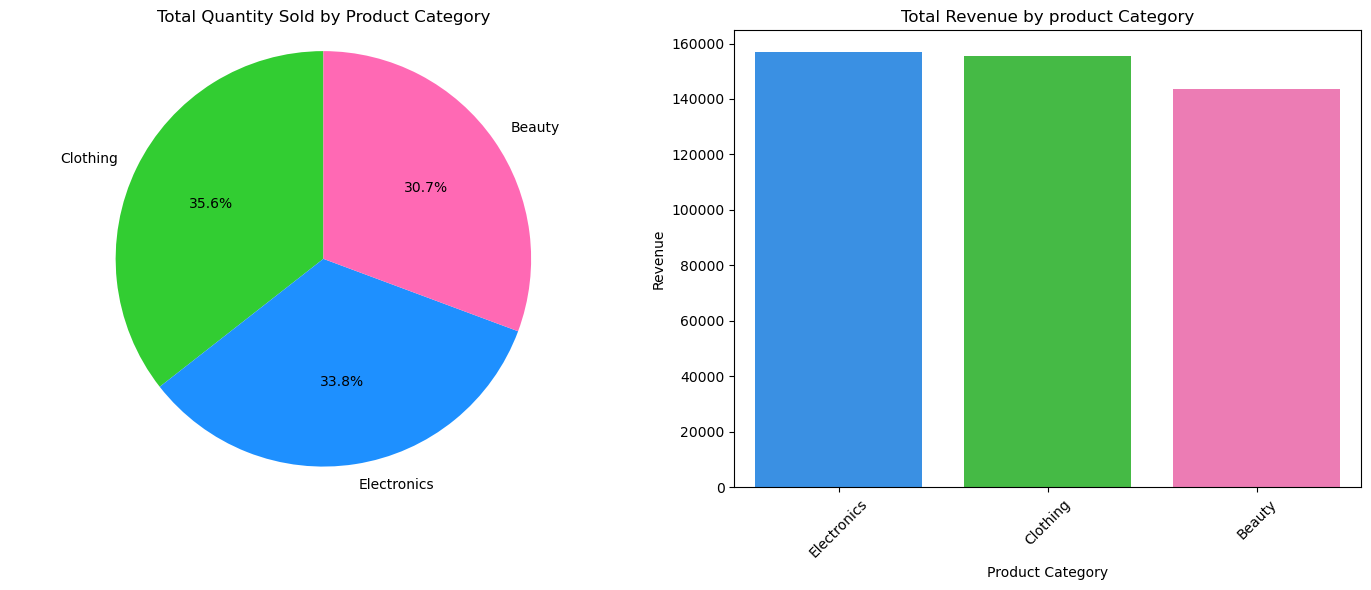

In [109]:
import matplotlib.pyplot as plt 
import seaborn as sns


colors = {
    'Beauty': '#FF69B4',
    'Clothing': '#32CD32',
    'Electronics': '#1E90FF'
}

plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.pie(
    df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False),
    labels=df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[colors[cat] for cat in df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).index]
)
plt.title('Total Quantity Sold by Product Category')
plt.axis('equal')

plt.subplot(1,2,2)
sns.barplot(
    x=df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).index,
    y=df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).values,
    palette = colors
)
plt.title('Total Revenue by product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

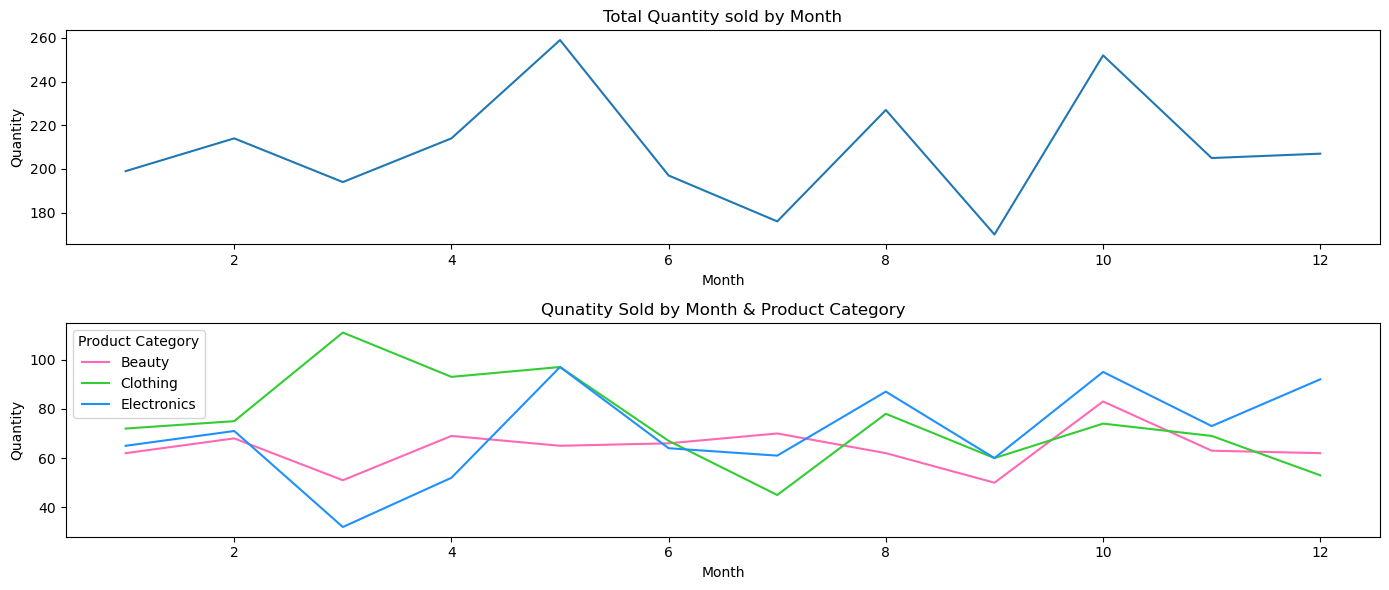

In [115]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.lineplot(
    x=df.groupby('Month')['Quantity'].sum().sort_index().index,
    y=df.groupby('Month')['Quantity'].sum().sort_index().values
)

plt.title('Total Quantity sold by Month')
plt.xlabel('Month')
plt.ylabel('Quantity')


plt.subplot(2,1,2)
sns.lineplot(
    data=df,
    x='Month',
    y='Quantity',
    hue='Product Category',
    estimator='sum',
    errorbar=None,
    palette=colors
)
plt.title('Qunatity Sold by Month & Product Category')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend(title='Product Category')

plt.tight_layout()
plt.show()

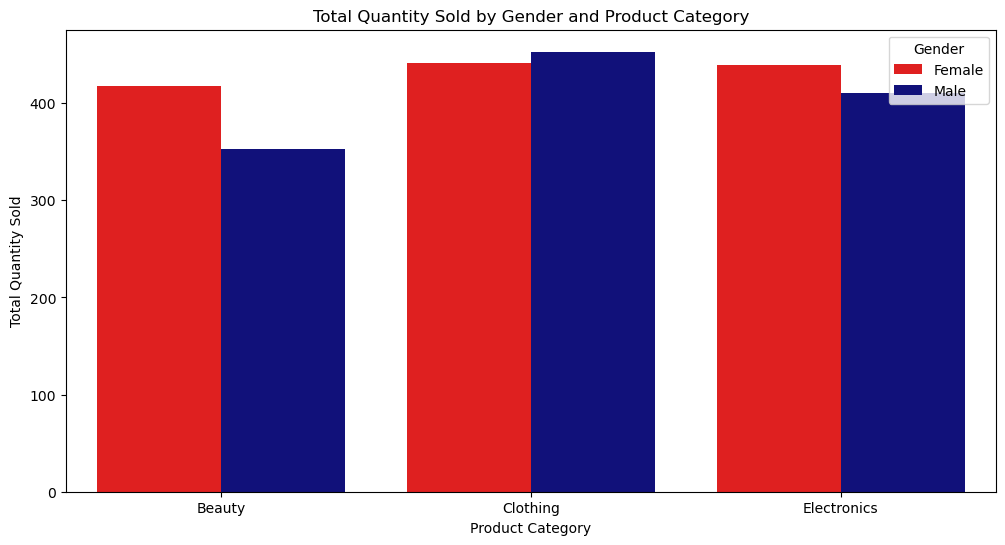

In [123]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=df.groupby(['Gender', 'Product Category'])['Quantity'].sum().reset_index(),
    x='Product Category',
    y='Quantity',
    hue='Gender',
    palette={'Female': 'red', 'Male': 'darkblue'}
)
plt.title('Total Quantity Sold by Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Gender')

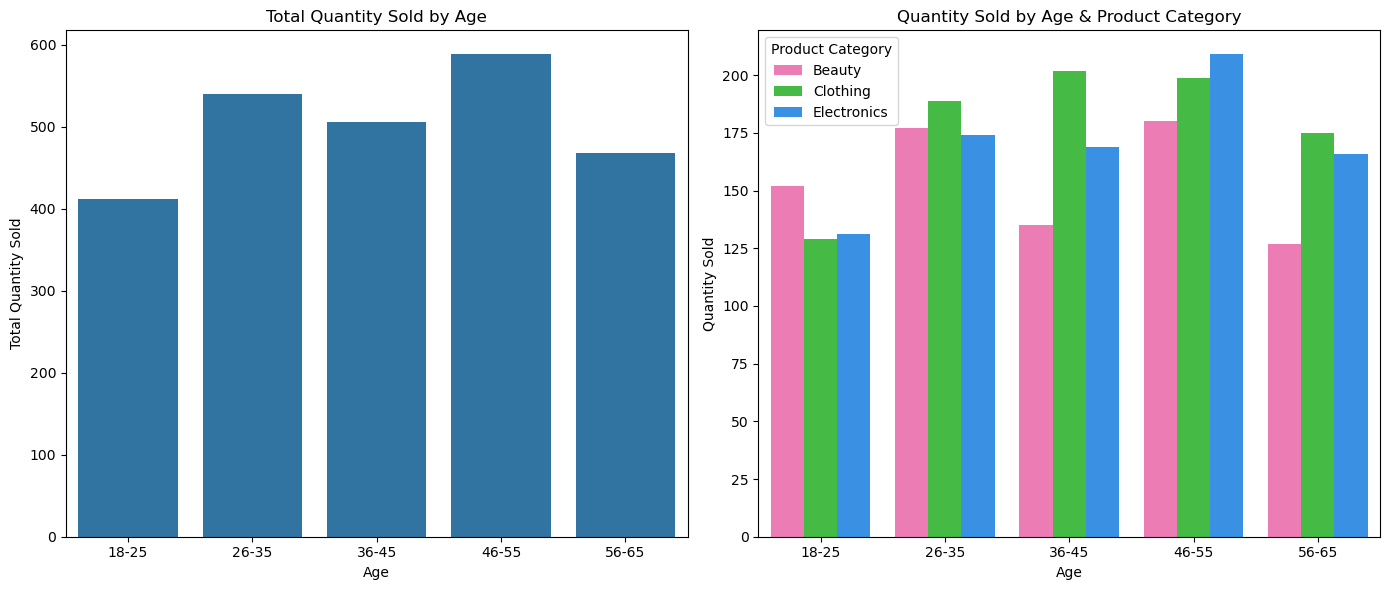

In [127]:
# By age group
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.barplot(
    data=df.groupby('Age')['Quantity'].sum().reset_index(),
    x='Age',
    y='Quantity'
)
plt.title('Total Quantity Sold by Age')
plt.xlabel('Age')
plt.ylabel('Total Quantity Sold')


plt.subplot(1,2,2)
sns.barplot(
    data=df.groupby(['Age','Product Category'])['Quantity'].sum().reset_index(),
    x='Age',
    y='Quantity',
    hue='Product Category',
    palette = colors
)

plt.title('Quantity Sold by Age & Product Category')
plt.xlabel('Age')
plt.ylabel('Quantity Sold')
plt.legend(title='Product Category')

plt.tight_layout()
plt.show()